In [1]:
import numpy as np # mostly used for array computing and for advanced mathematical functions.
import pandas as pd # imports pandas package, aliases as pd

## Exploratory Data Analytics
###### Data exploration is one of the key tasks a data analyst performs


In [2]:
df = pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.info() # prints information about a DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.shape # gets the number of rows and columns

(1338, 7)

In [5]:
df.describe() # gets descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


###### Checking dataset for missing values and valid entries

In [6]:
df['smoker'].value_counts(dropna = False)

no     1064
yes     274
Name: smoker, dtype: int64

## Exploratory Visualization

In [7]:
# add dataviz


In [8]:
import matplotlib.pyplot as plt

In [9]:
top_pay = df.nlargest(8, columns=['bmi','age','charges'])

In [10]:
top_pay

,age,sex,bmi,children,smoker,region,charges
1317,18,male,53.13,0,no,southeast,1163.4627
1047,22,male,52.58,1,yes,southeast,44501.3982
847,23,male,50.38,1,no,southeast,2438.0552
116,58,male,49.06,0,no,southeast,11381.3254
286,46,female,48.07,2,no,northeast,9432.9253
1088,52,male,47.74,1,no,southeast,9748.9106
860,37,female,47.60,2,yes,southwest,46113.5110
401,47,male,47.52,1,no,southeast,8083.9198


### Reshaping the data using aggregate functions and `groupby`

In [52]:
grouped_df = df.groupby('region', as_index=False)['charges'].mean() # creates a new data frame with regions as new rows and means of carges as values
grouped_df.columns = grouped_df.columns.str.replace('charges', 'mean_charges') # renames charges into mean_charges
grouped_df['median_charges'] = df.groupby('region', as_index=False)['charges'].median()['charges'] # adds a new column with median charges
grouped_df['max_charges'] = df.groupby('region', as_index=False)['charges'].max()['charges'] # adds a new column with maximum charges
grouped_df['max_charges'] = df.groupby('region', as_index=False)['charges'].min()['charges'] # adds a new column with minimum charges
grouped_df

,region,mean_charges,median_charges,max_charges
0,northeast,13406.384516,10057.652025,1694.7964
1,northwest,12417.575374,8965.795750,1621.3402
2,southeast,14735.411438,9294.131950,1121.8739
3,southwest,12346.937377,8798.593000,1241.5650


In [11]:
import plotly.express as px
# Creating a piechart, specifying the values and labels
fig = px.pie(top_pay, values=top_pay['charges'], names=top_pay['age'], title='Top Charges By Age')
# Shows the chart.
fig.show()

In [43]:
df.head(1) # checking that the original dataframe is the same as it was and was not affected by the grouping by

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.924


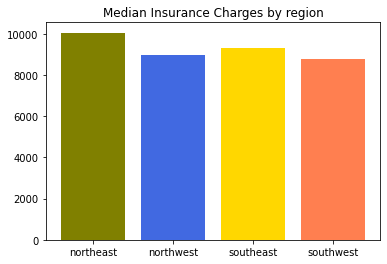

In [51]:
import matplotlib.pyplot as plt
fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])
x = grouped_df['region']
y = grouped_df['median_charges']
colors = [ 'olive', 'royalblue', 'gold','coral']
plt.bar(x,y, color = colors)
plt.title("Median Insurance Charges by Region")
plt.show()

In [13]:
df[df['region']=='northwest']

,age,sex,bmi,children,smoker,region,charges
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
7,37,female,27.740,3,no,northwest,7281.50560
9,60,female,25.840,0,no,northwest,28923.13692
24,37,male,28.025,2,no,northwest,6203.90175
...,...,...,...,...,...,...,...
1319,39,female,26.315,2,no,northwest,7201.70085
1320,31,male,31.065,3,no,northwest,5425.02335
1324,31,male,25.935,1,no,northwest,4239.89265
1333,50,male,30.970,3,no,northwest,10600.54830


In [14]:
mean = []

for i in range(0,20000):
    sample = df.sample(n=200)
    mean.append(sample['charges'].mean())
# mean

<AxesSubplot:>

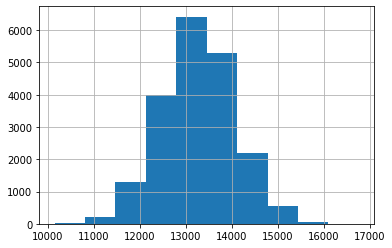

In [15]:
series_mean = pd.Series(mean)
series_mean.hist()

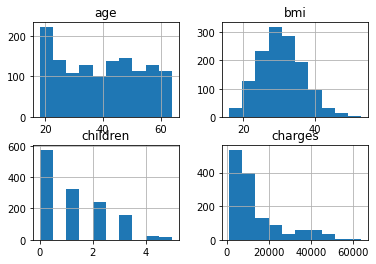

In [54]:
df.hist();

## Statistical hypothesis testing


In [17]:
rand_num = np.random.randint(0,10) #generates a random integer

In [18]:
np.array

<function numpy.array>

In [19]:
array_from_range = np.arange(0,100) # one liner to make an array from a range

## Statistical Modeling

## Linear Regression

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=04eeb7cc-c014-42cc-9688-959f70fd96bb' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>